In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from implementations import *
from sklearn import naive_bayes as nb
from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

#to access our implemented ML functions
%load_ext autoreload
%autoreload 2

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data_path = data_file(20.0)

In [3]:
data = clean_df(build_df(data_path))

In [4]:
data.head()

,index,X(mm),Y(mm),Z(mm),DX,DY,DZ,KinE(MeV),dE(MeV),StepLeng,X(mm)_s,Y(mm)_s,Z(mm)_s,DX_s,DY_s,DZ_s,Kin(MeV)_s,name_s
0,0,0.00,100.0,100.0,1.000,0.000,0.00000,20.0,0.000,0.00,0.00,0.0,0.0,0.000,0.000,0.0000,0.000,0
1,1,4.12,99.8,100.0,0.987,-0.160,-0.01220,18.4,0.563,4.12,4.12,99.8,100.0,0.802,0.592,0.0804,1.070,e-
2,2,8.26,99.1,100.0,0.974,-0.227,-0.01810,17.6,0.621,4.22,8.26,99.1,100.0,0.506,0.811,-0.2930,0.119,e-
3,3,12.90,98.2,100.0,0.983,-0.184,0.00546,16.8,0.779,4.78,0.00,0.0,0.0,0.000,0.000,0.0000,0.000,0
4,4,14.60,97.8,100.0,0.937,-0.331,0.10700,11.6,0.311,1.69,14.60,97.8,100.0,0.987,0.133,-0.0869,4.890,e-


### Plot of the probability repartition of our data

<AxesSubplot: xlabel='KinE(MeV)', ylabel='Density'>

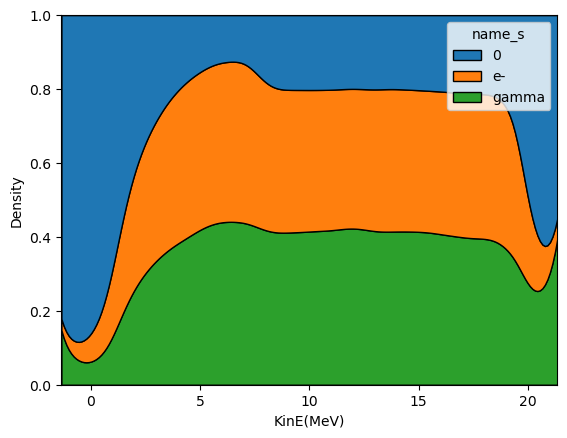

In [5]:
sns.kdeplot(data=data, x="KinE(MeV)", hue = "name_s", common_norm=False, multiple="fill", alpha=1)

## Creation of the probability reference table 

In [10]:
table_of_p = proba_table(data, diff = 0.1)

In [11]:
table_of_p

,Energy_min,Energy_max,proba_0,proba_1,proba_2
0,0.0,0.1,0.994735,0.004423,0.000842
1,0.1,0.2,0.974427,0.019818,0.005755
2,0.2,0.3,0.960695,0.031893,0.007411
3,0.3,0.4,0.948833,0.041619,0.009548
4,0.4,0.5,0.935091,0.054127,0.010782
...,...,...,...,...,...
194,19.4,19.5,0.739093,0.224979,0.035928
195,19.5,19.6,0.776230,0.220984,0.002786
196,19.6,19.8,0.746261,0.253223,0.000516
197,19.8,19.9,0.503480,0.494200,0.002320
